# Exploratory Data Analysis


In [1]:
import pandas as pd
import numpy as np
dep = pd.read_csv('dep.csv')
dep

,index,subreddit,date,post,covid period,gender
0,0,depression,2019-08-28,the sun hasnt even came up and im f ready to g...,pre,female
1,1,depression,2019-08-28,i am just so exhausted im f currently in an in...,pre,female
2,2,depression,2019-10-08,not sure if i am depressed burnt out or if soc...,pre,female
3,3,depression,2019-10-08,hi this is my first post just wanted to talk t...,pre,female
4,4,depression,2018-11-07,i f felt like i had my shit together at now i ...,pre,female
...,...,...,...,...,...,...
847,440,depression,2023-07-25,hello all i m and my girlfriend f have been to...,post,male
848,441,depression,2023-07-25,hey yall been depressed since i was m now bee...,post,male
849,442,depression,2023-07-25,i am m i used to be a chain smoker and i decid...,post,male
850,443,depression,2023-07-24,im m i am studying in college but never had a ...,post,male


In [2]:
#Data visiualzation libraries 
import matplotlib.pyplot as plt
import seaborn as sns

#Vectorization libraries 
from nltk.tokenize import word_tokenize 
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

%config InlineBackend.figure_format = 'retina'
plt.style.use('fivethirtyeight')

Matplotlib is building the font cache; this may take a moment.


In [3]:
#Drop dubplicates
dep.drop_duplicates(inplace = True)
dep.reset_index(drop = True, inplace = True)

In [4]:
#From the eda, remove popular words that are not that significant 
common_words = ["feel", "like", "just", "im", "know", "need", "tl", 
               "dr", "tldr","amp", "nbsp", "really", "mom", "mum"
               , "parent", "nparent", "nmom", "dad", "father", 
                "brother", "ex", "nex", "sister", "ns", "mother"
               "because", "wife", "girlfriend", "husband", "boyfriend", "gf", "bf", "ive", "ve", "don"
               "his", "she", "shes", "hes", "https", "www", "com", "spotify", "youtube", "user",]

time_words = ["time", "today", "tomorrow", "yesterday", "morning", 
              "afternoon", "night", "day", "week", "weekend", "month",
             "year", "days", "weeks", "weekends", "months", "years", 
              "monday", "tuesday", "wednesday", "thursday", "friday", 
              "saturday", "sunday", "mon", "tues", "wed", "thurs", "fri",
              "sat", "sun", "january", "february", "march", "april", "may",
              "june", "july", "august", "september", "october", "november",
              "decemebr", "jan", "feb", "mar", "april", "may", "jun", "jul",
              "aug", "sep", "oct", "nov", "dec"]
        

#add both lists together
additional_stop_words = common_words + time_words

In [5]:
english_stop_words = text.ENGLISH_STOP_WORDS
combined_stop_words = english_stop_words.union(additional_stop_words)

In [6]:
# Convert the set of stop words to a list
stop_words_list = list(combined_stop_words)

## Common Terms

### Pre-covid

In [7]:
#Making dataframe for pre covid
df1 = dep[dep["covid period"].str.contains("post")==False].reset_index()
df1

,level_0,index,subreddit,date,post,covid period,gender
0,0,0,depression,2019-08-28,the sun hasnt even came up and im f ready to g...,pre,female
1,1,1,depression,2019-08-28,i am just so exhausted im f currently in an in...,pre,female
2,2,2,depression,2019-10-08,not sure if i am depressed burnt out or if soc...,pre,female
3,3,3,depression,2019-10-08,hi this is my first post just wanted to talk t...,pre,female
4,4,4,depression,2018-11-07,i f felt like i had my shit together at now i ...,pre,female
...,...,...,...,...,...,...,...
232,532,125,depression,2019-03-10,i m would have killed myself if it werent for ...,pre,male
233,533,126,depression,2019-04-12,depressed for years take some time to read and...,pre,male
234,534,127,depression,2018-11-20,parents of children having electroshock please...,pre,male
235,535,128,depression,2018-11-20,breakdown m here i dont know if this will make...,pre,male


In [8]:
cvec1 = CountVectorizer(stop_words=stop_words_list, 
                        min_df=0.0001, ngram_range=(1, 1), max_df=1.0)

In [9]:
term_mat1 = cvec1.fit_transform(df1['post'])

term_df1 = pd.DataFrame(term_mat1.toarray(), columns=cvec1.get_feature_names_out())

In [10]:
#Boolean for class 
#1 for male
#0 for female

sub = np.where(df1["gender"] == "male", 1,0 )

In [11]:
#Inserting class column into dataframe with filtered post
term_df1.insert(0, 'post_metric', sub)

In [12]:
#Dataframe for the 30 most frequently used terms
top_terms1 = term_df1.groupby('post_metric').mean().T.sort_values(0, ascending = False).head(30)

In [13]:
print(top_terms1.index)
print(top_terms1.columns)

Index(['dont', 'depression', 'want', 'life', 'friends', 'going', 'things',
       'school', 'work', 'help', 'didnt', 'depressed', 'think', 'people',
       'anxiety', 'told', 'family', 'long', 'better', 'make', 'love', 'way',
       'talk', 'parents', 'feeling', 'right', 'good', 'home', 'lot', 'said'],
      dtype='object')
Int64Index([0, 1], dtype='int64', name='post_metric')


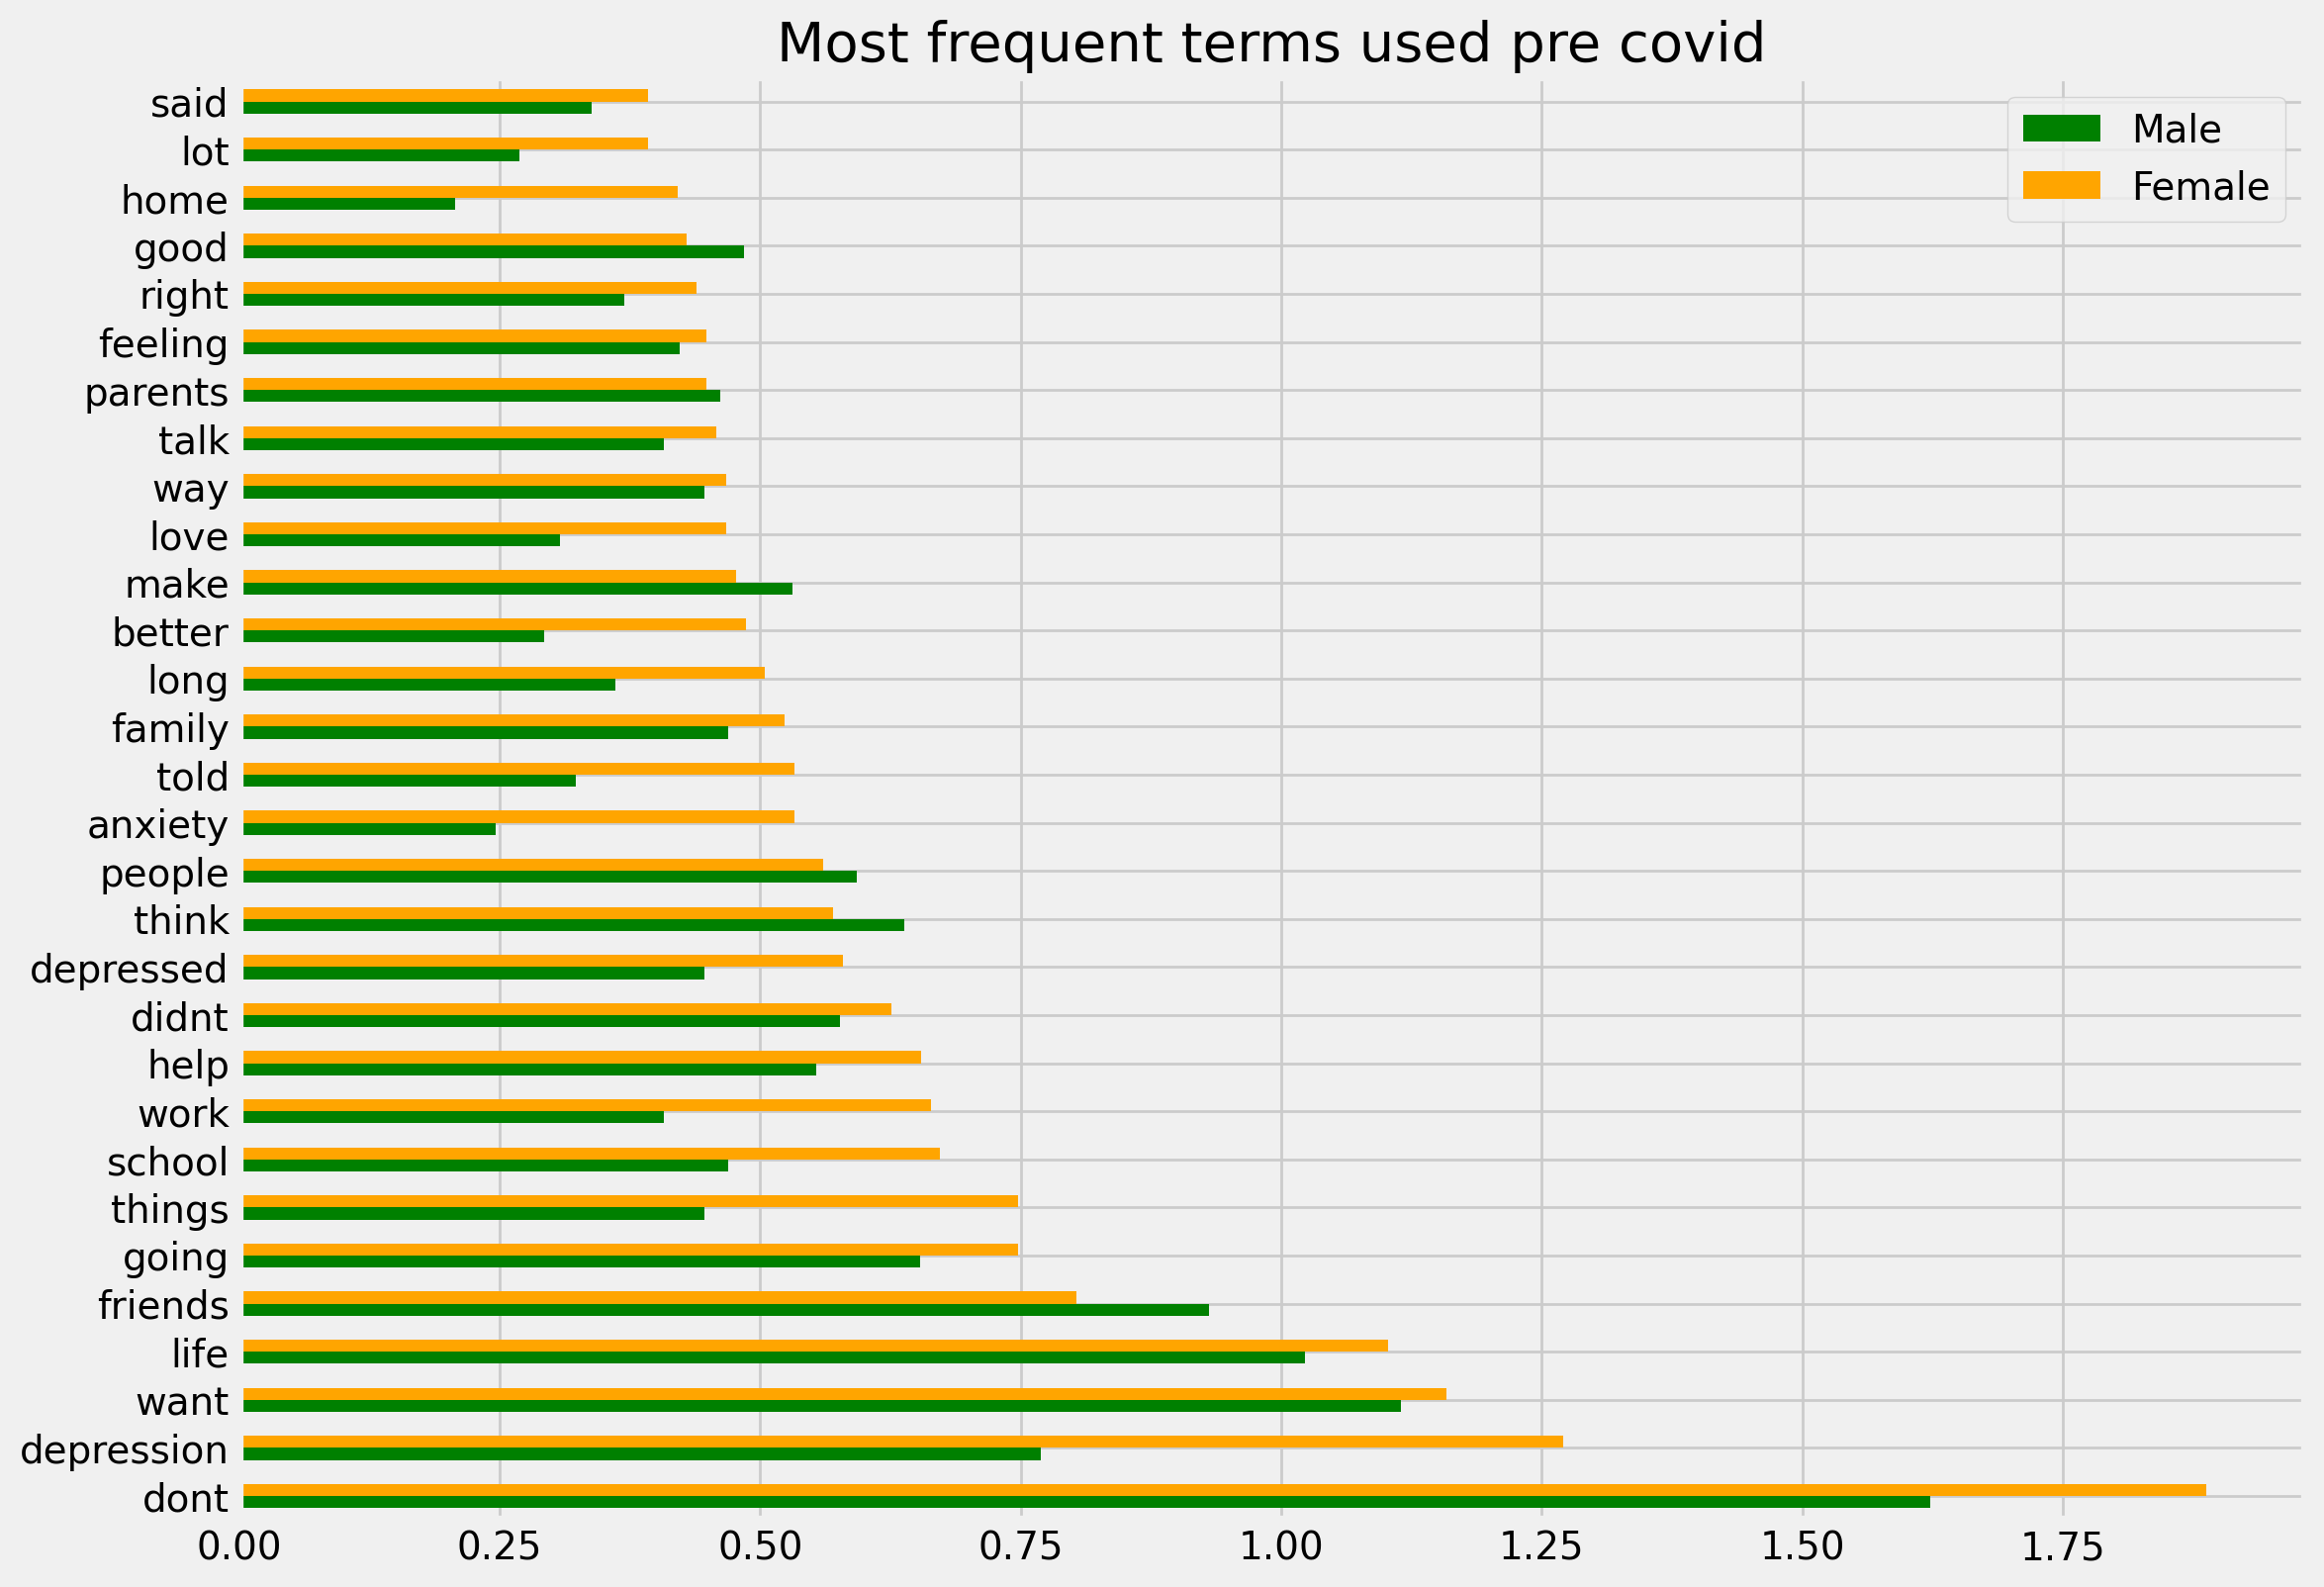

In [59]:
# Visulaization of the top terms between male and females
common_pre = top_terms1.plot(y=[1,0], kind='barh', color=['green', 'orange'], figsize=(12, 9))

#Title of barplot 
plt.title("Most frequent terms used pre covid")

#Plot legend
plt.legend(labels=["Male", "Female"])


In [60]:
#saving the visual 
common_pre.figure.savefig("pre_common.png")

##### [ADD COMMENT ON VISIUAL]

### Post-covid

In [15]:
#Making dataframe for post covid
df2 = dep[dep["covid period"].str.contains("pre")==False].reset_index()
df2

,level_0,index,subreddit,date,post,covid period,gender
0,107,107,depression,2020-01-01,affirmations for wealth amp happiness livestre...,post,female
1,108,108,depression,2020-01-01,anyone else overcome with numbness im f medica...,post,female
2,109,109,depression,2020-01-01,seasonal depression or just summer boredom f i...,post,female
3,110,110,depression,2020-01-01,im stuck f its the first day of the new year a...,post,female
4,111,111,depression,2020-01-01,rules for life books to video motivation only...,post,female
...,...,...,...,...,...,...,...
610,847,440,depression,2023-07-25,hello all i m and my girlfriend f have been to...,post,male
611,848,441,depression,2023-07-25,hey yall been depressed since i was m now bee...,post,male
612,849,442,depression,2023-07-25,i am m i used to be a chain smoker and i decid...,post,male
613,850,443,depression,2023-07-24,im m i am studying in college but never had a ...,post,male


In [16]:
#Create a count vectorizer for two words

cvec2 = CountVectorizer(stop_words=stop_words_list, 
                        min_df=0.0001, ngram_range=(1, 1), max_df=1.0)

In [17]:
term_mat2 = cvec2.fit_transform(df2['post'])

term_df2 = pd.DataFrame(term_mat2.toarray(), columns=cvec2.get_feature_names_out())

In [18]:
#Boolean for class 
#1 for male
#0 for female

sub1 = np.where(df2["gender"] == "male", 1,0 )

In [19]:
#Inserting class column into dataframe with filtered post
term_df2.insert(0, 'post_metric2', sub1)

In [20]:
#Dataframe for the 30 most frequently used terms
top_terms2 = term_df2.groupby('post_metric2').mean().T.sort_values(0, ascending = False).head(30)

In [21]:
print(top_terms2.index)
print(top_terms2.columns)

Index(['dont', 'depression', 'want', 'life', 'help', 'going', 'think',
       'friends', 'people', 'depressed', 'work', 'things', 'family', 'feeling',
       'school', 'love', 'better', 'bad', 'way', 'make', 'didnt', 'got',
       'anxiety', 'job', 'good', 'lot', 'anymore', 'home', 'relationship',
       'long'],
      dtype='object')
Int64Index([0, 1], dtype='int64', name='post_metric2')


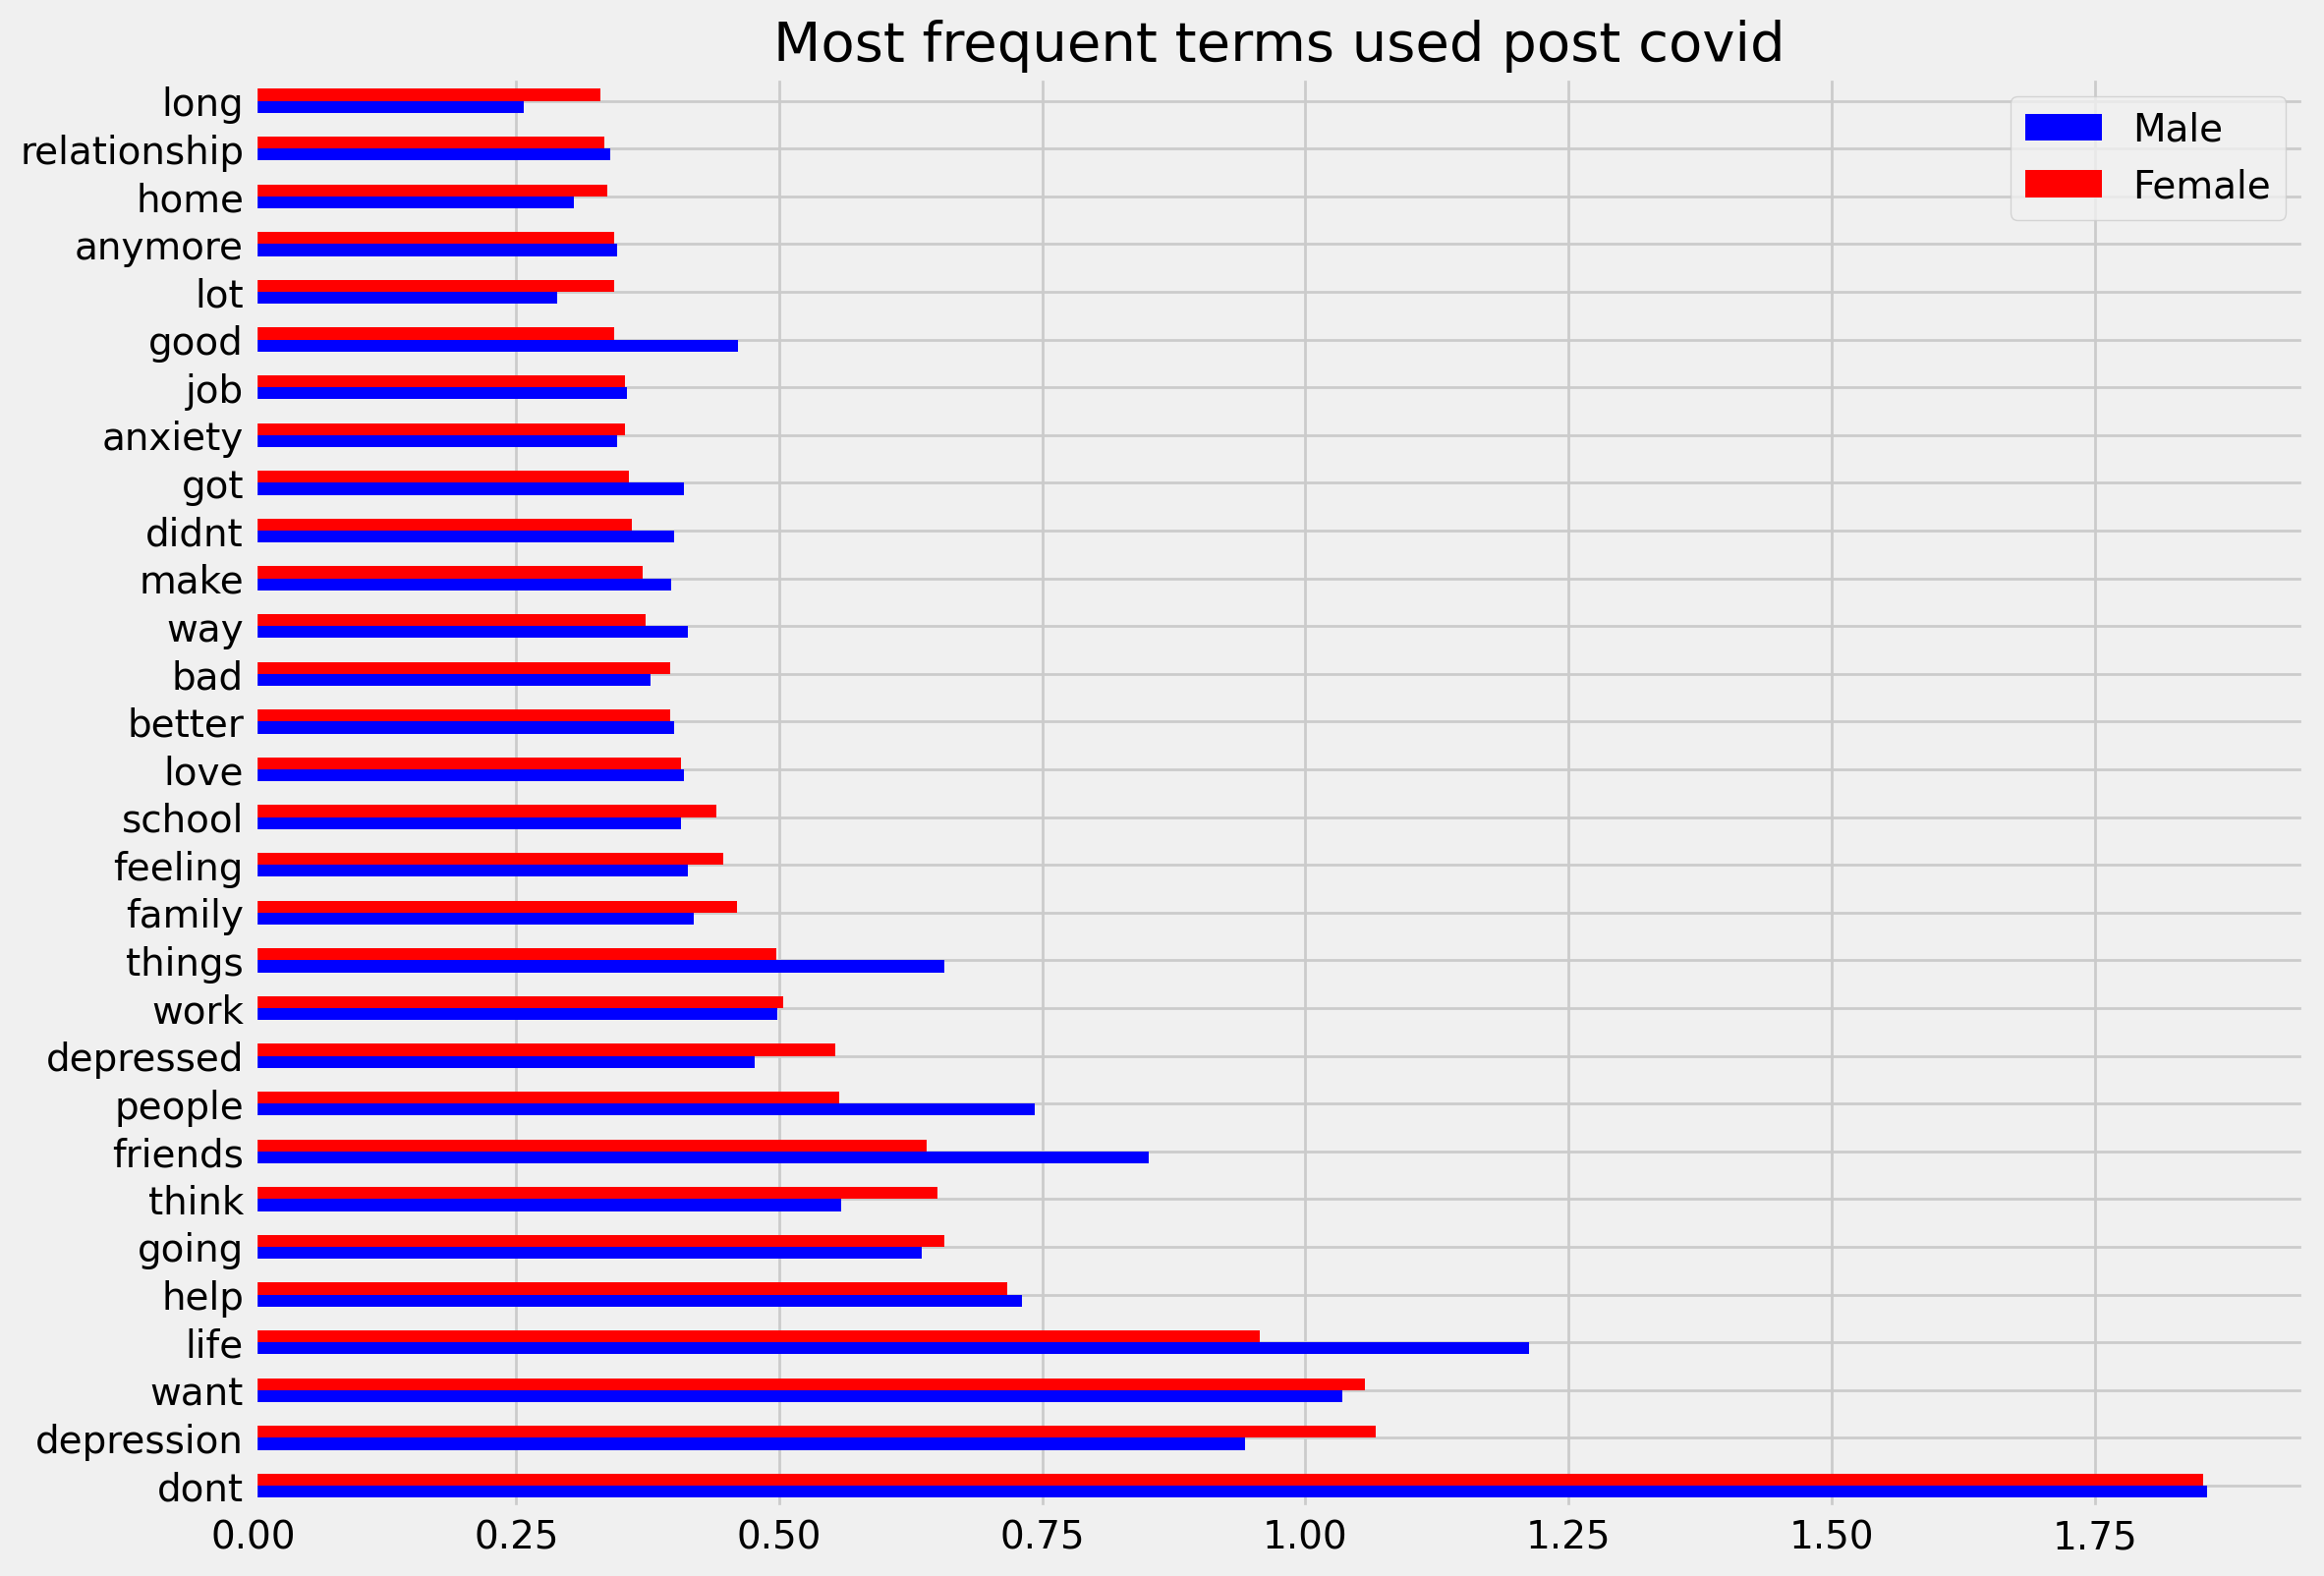

In [61]:
#Visulaization of the top terms between male and females
common_post = top_terms2.plot(y=[1,0], kind='barh', color=['blue', 'red'], figsize=(12, 9))

#Title of barplot 
plt.title("Most frequent terms used post covid")

#Plot legend
plt.legend(labels=["Male", "Female"])

In [62]:
common_post.figure.savefig("common_post.png")

#### [ADD COMMENT ABOUT VISUAL]

## Bigram Visualizations 

### Pre-covid

In [23]:
#Create a count vectorizer for two words

cvec3 = CountVectorizer(stop_words=stop_words_list, 
                        min_df=0.0001, ngram_range=(2,3), max_df=1.0)

In [24]:
#Fitting and transforming the data for term frequency in each post
term_mat3 = cvec3.fit_transform(df1['post'])

In [25]:
#Make a dataframe for the words
term_df1 = pd.DataFrame(term_mat3.toarray(), columns=cvec3.get_feature_names_out())

In [26]:
#Inserting class column into dataframe with filtered post
term_df1.insert(0, 'post_metric3', sub)

In [27]:
#sorting by top 30 bigrams 
top_bigrams1 = term_df1.groupby('post_metric3').mean().T.sort_values(0, ascending = False).head(30)

In [28]:
top_bigrams1 = top_bigrams1.head(30)

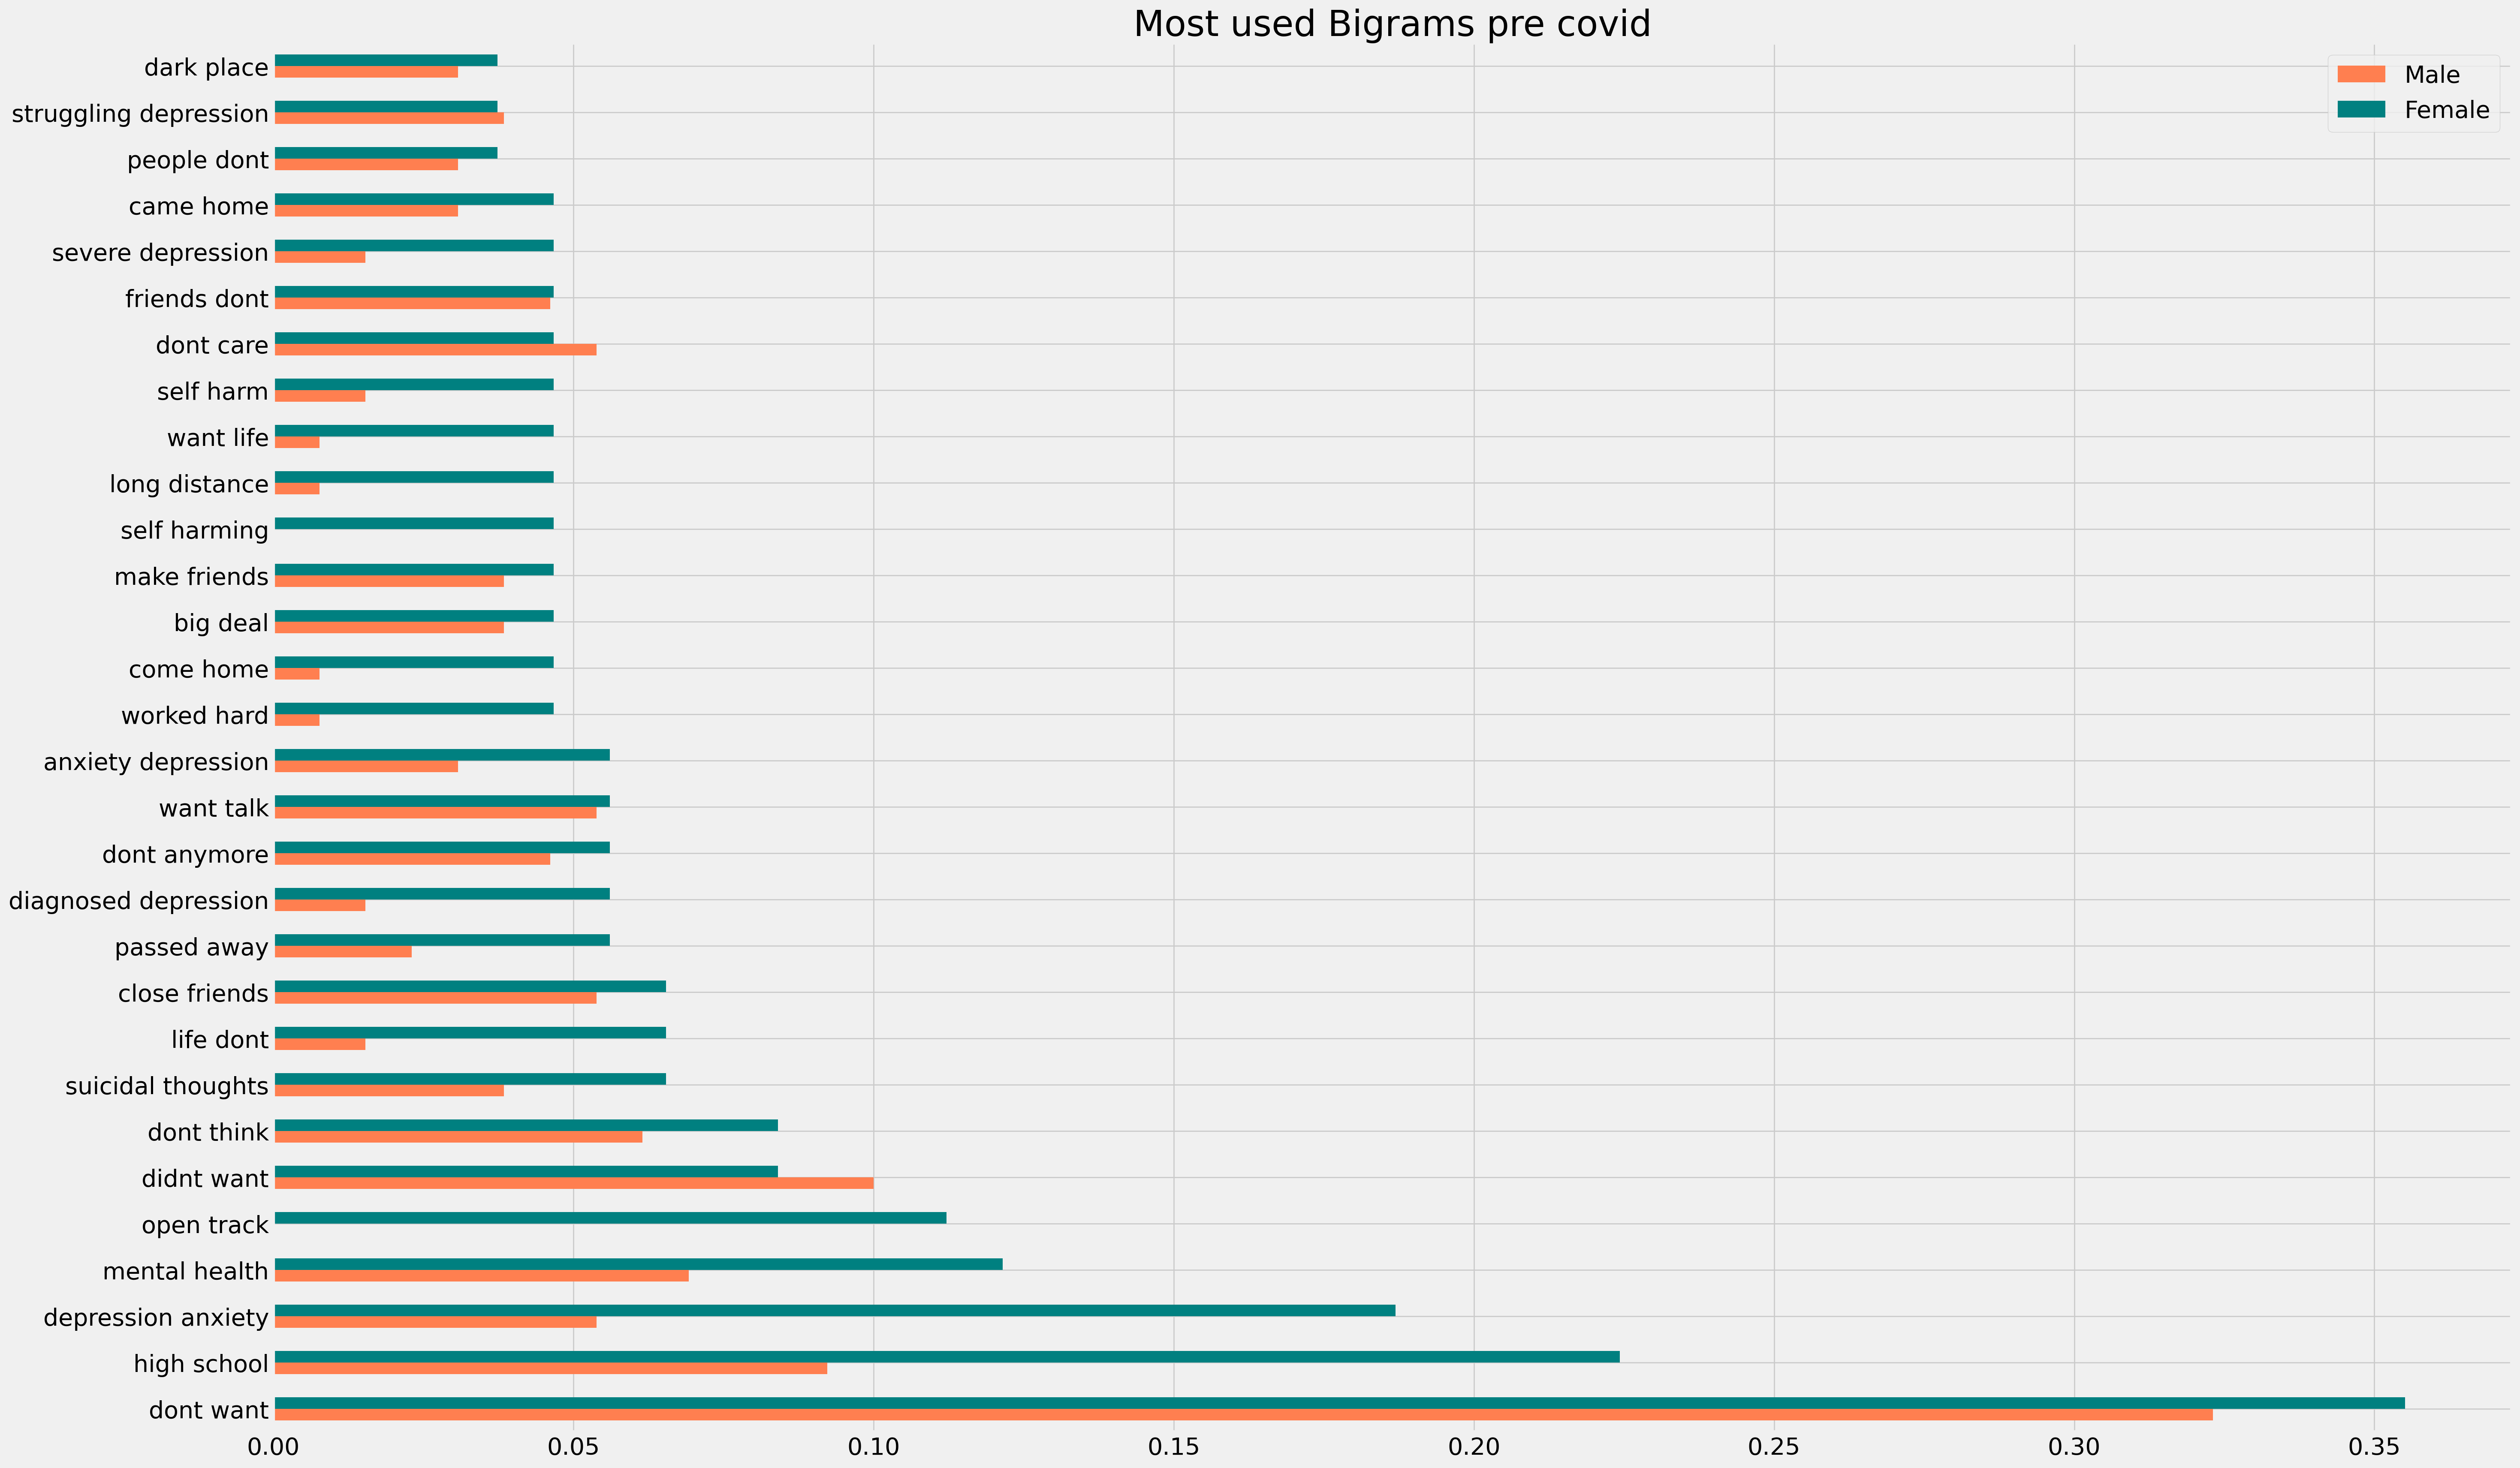

In [64]:
#visulaization of each subreddit 
bigram_pre = top_bigrams1.plot(y=[1,0], kind = "barh", color = ["coral", "teal"], figsize = (30,20), fontsize = 20)
plt.title("Most used Bigrams pre covid", fontsize = 30)
plt.legend(labels = ["Male", "Female"], fontsize=20)

In [66]:
bigram_pre.figure.savefig("bigram_pre.png")

#### [ADD COMMENT ABOUT VISUAL!!!]

### Post-covid

In [30]:
df1["gender"].value_counts(normalize=True)
df2["gender"].value_counts(normalize=True)


male      0.512195
female    0.487805
Name: gender, dtype: float64

In [31]:
#Create a count vectorizer for singular words
#Best model I could find
cvec4 = CountVectorizer(stop_words=stop_words_list, 
                        min_df=0.0001, ngram_range=(2,3), max_df=1.0)

In [32]:
#Fitting and transforming the data for term frequency in each post
term_mat4 = cvec4.fit_transform(df2['post'])

In [33]:
#Make a dataframe for the non stop words
term_df2_post = pd.DataFrame(term_mat4.toarray(), columns=cvec4.get_feature_names_out())

In [34]:
#Inserting class column into dataframe with filtered post
term_df2_post.insert(0, 'post_metric4', sub1)

In [35]:
#sorting by top 30 bigrams 
top_bigrams2 = term_df2_post.groupby('post_metric4').mean().T.sort_values(0, ascending = False).head(30)

In [36]:
top_bigrams2 = top_bigrams2.head(30)

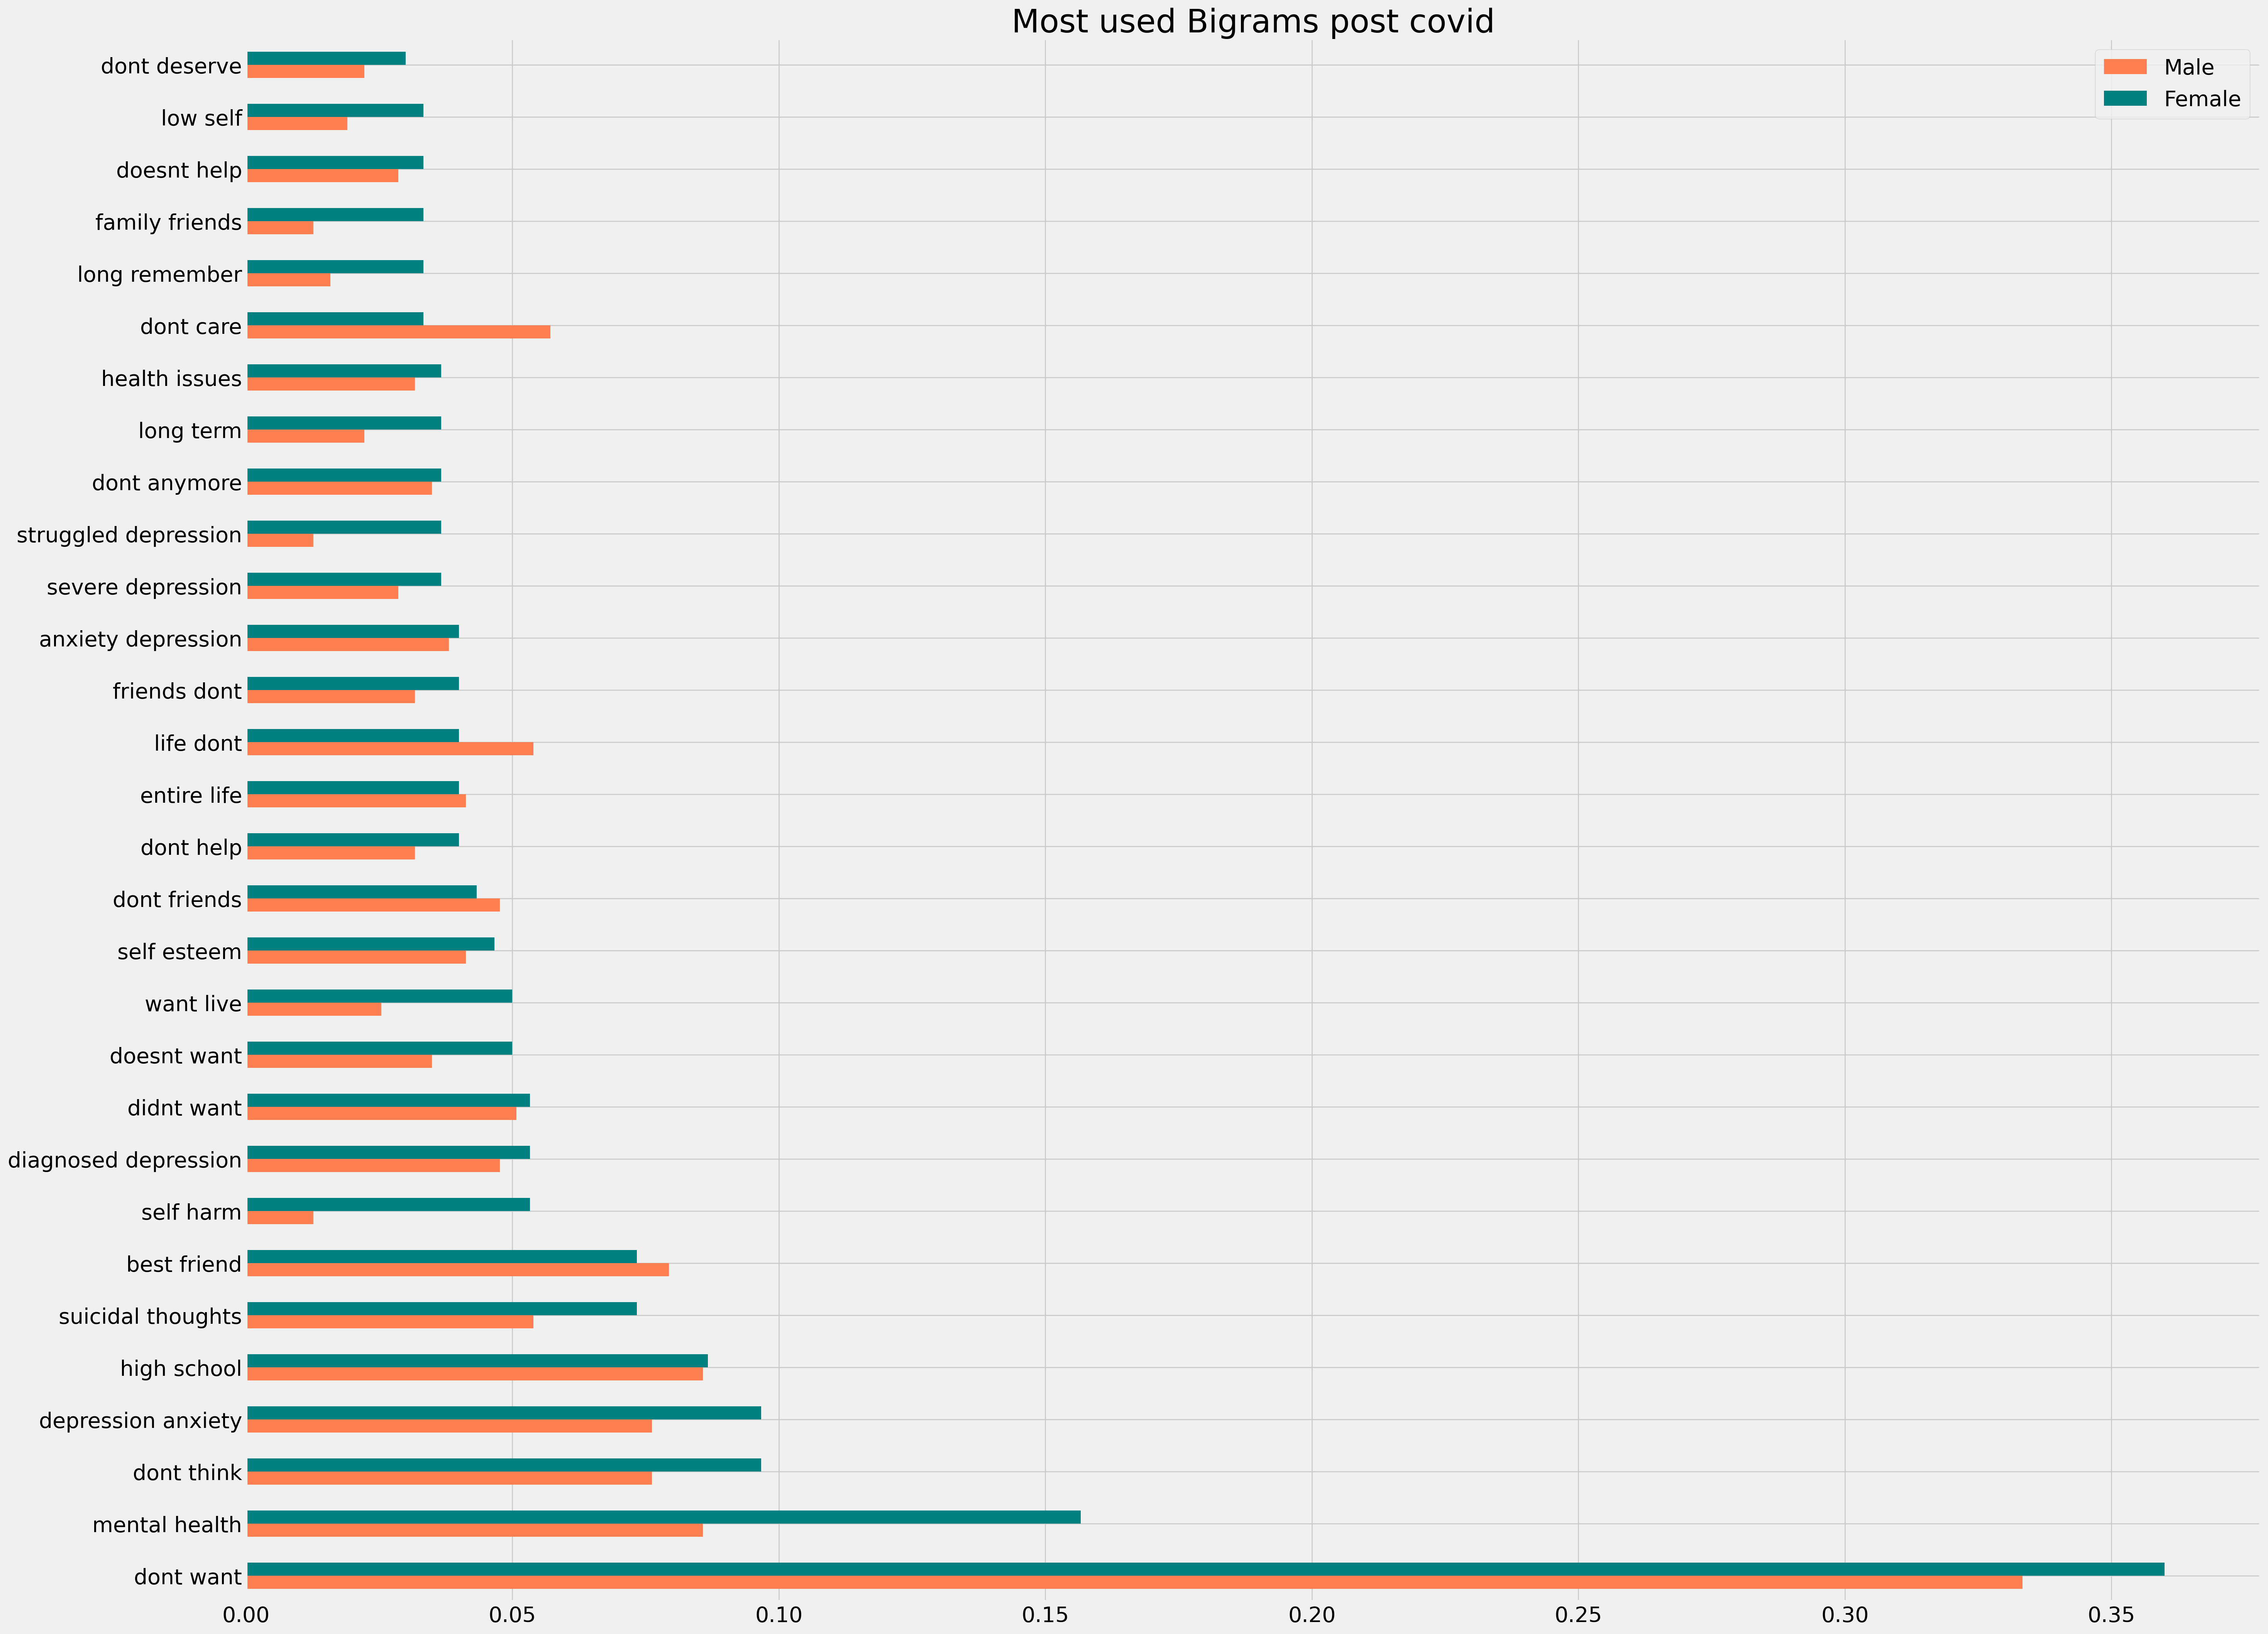

In [67]:
#visulaization of each subreddit 
bigram_post = top_bigrams2.plot(y=[1,0], kind = "barh", color = ["coral", "teal"], figsize = (30,25), fontsize = 20)
plt.title("Most used Bigrams post covid", fontsize = 30)
plt.legend(labels = ["Male", "Female"], fontsize=20)

In [68]:
bigram_post.figure.savefig("bigram_post")

#### [ADD COMMENT ABOUT VISUAL!!!]

## Trigram Visualizations

### Pre-covid

In [38]:
#Create a count vectorizer for two words
#Best model I could find 
cvec5 = CountVectorizer(stop_words=stop_words_list, 
                        min_df=0.01, ngram_range=(3, 4), max_df=1.0)

In [39]:
#Fitting and transforming the data for term frequency in each post
term_mat5 = cvec5.fit_transform(df1['post'])

In [40]:
#Make a dataframe for the non stop words
term_df1_post = pd.DataFrame(term_mat5.toarray(), columns=cvec5.get_feature_names_out())

In [41]:
#Inserting class column into dataframe with filtered post
term_df1_post.insert(0, 'post_metric5', sub)

In [42]:
#sorting by top 30 bigrams 
top_trigrams= term_df1_post.groupby('post_metric5').mean().T.sort_values(0, ascending = False).head(30)

In [43]:
top_trigrams = top_trigrams.head(30)
top_trigrams

post_metric5,0,1
friends dont want,0.028037,0.000000
major depressive disorder,0.028037,0.000000
diagnosed depression anxiety,0.028037,0.007692
friends high school,0.028037,0.000000
long story short,0.018692,0.061538
live hours away,0.018692,0.015385
having anxiety attack,0.018692,0.007692
hate life right,0.018692,0.007692
curl ball sleep,0.018692,0.007692
feels dont want,0.018692,0.007692


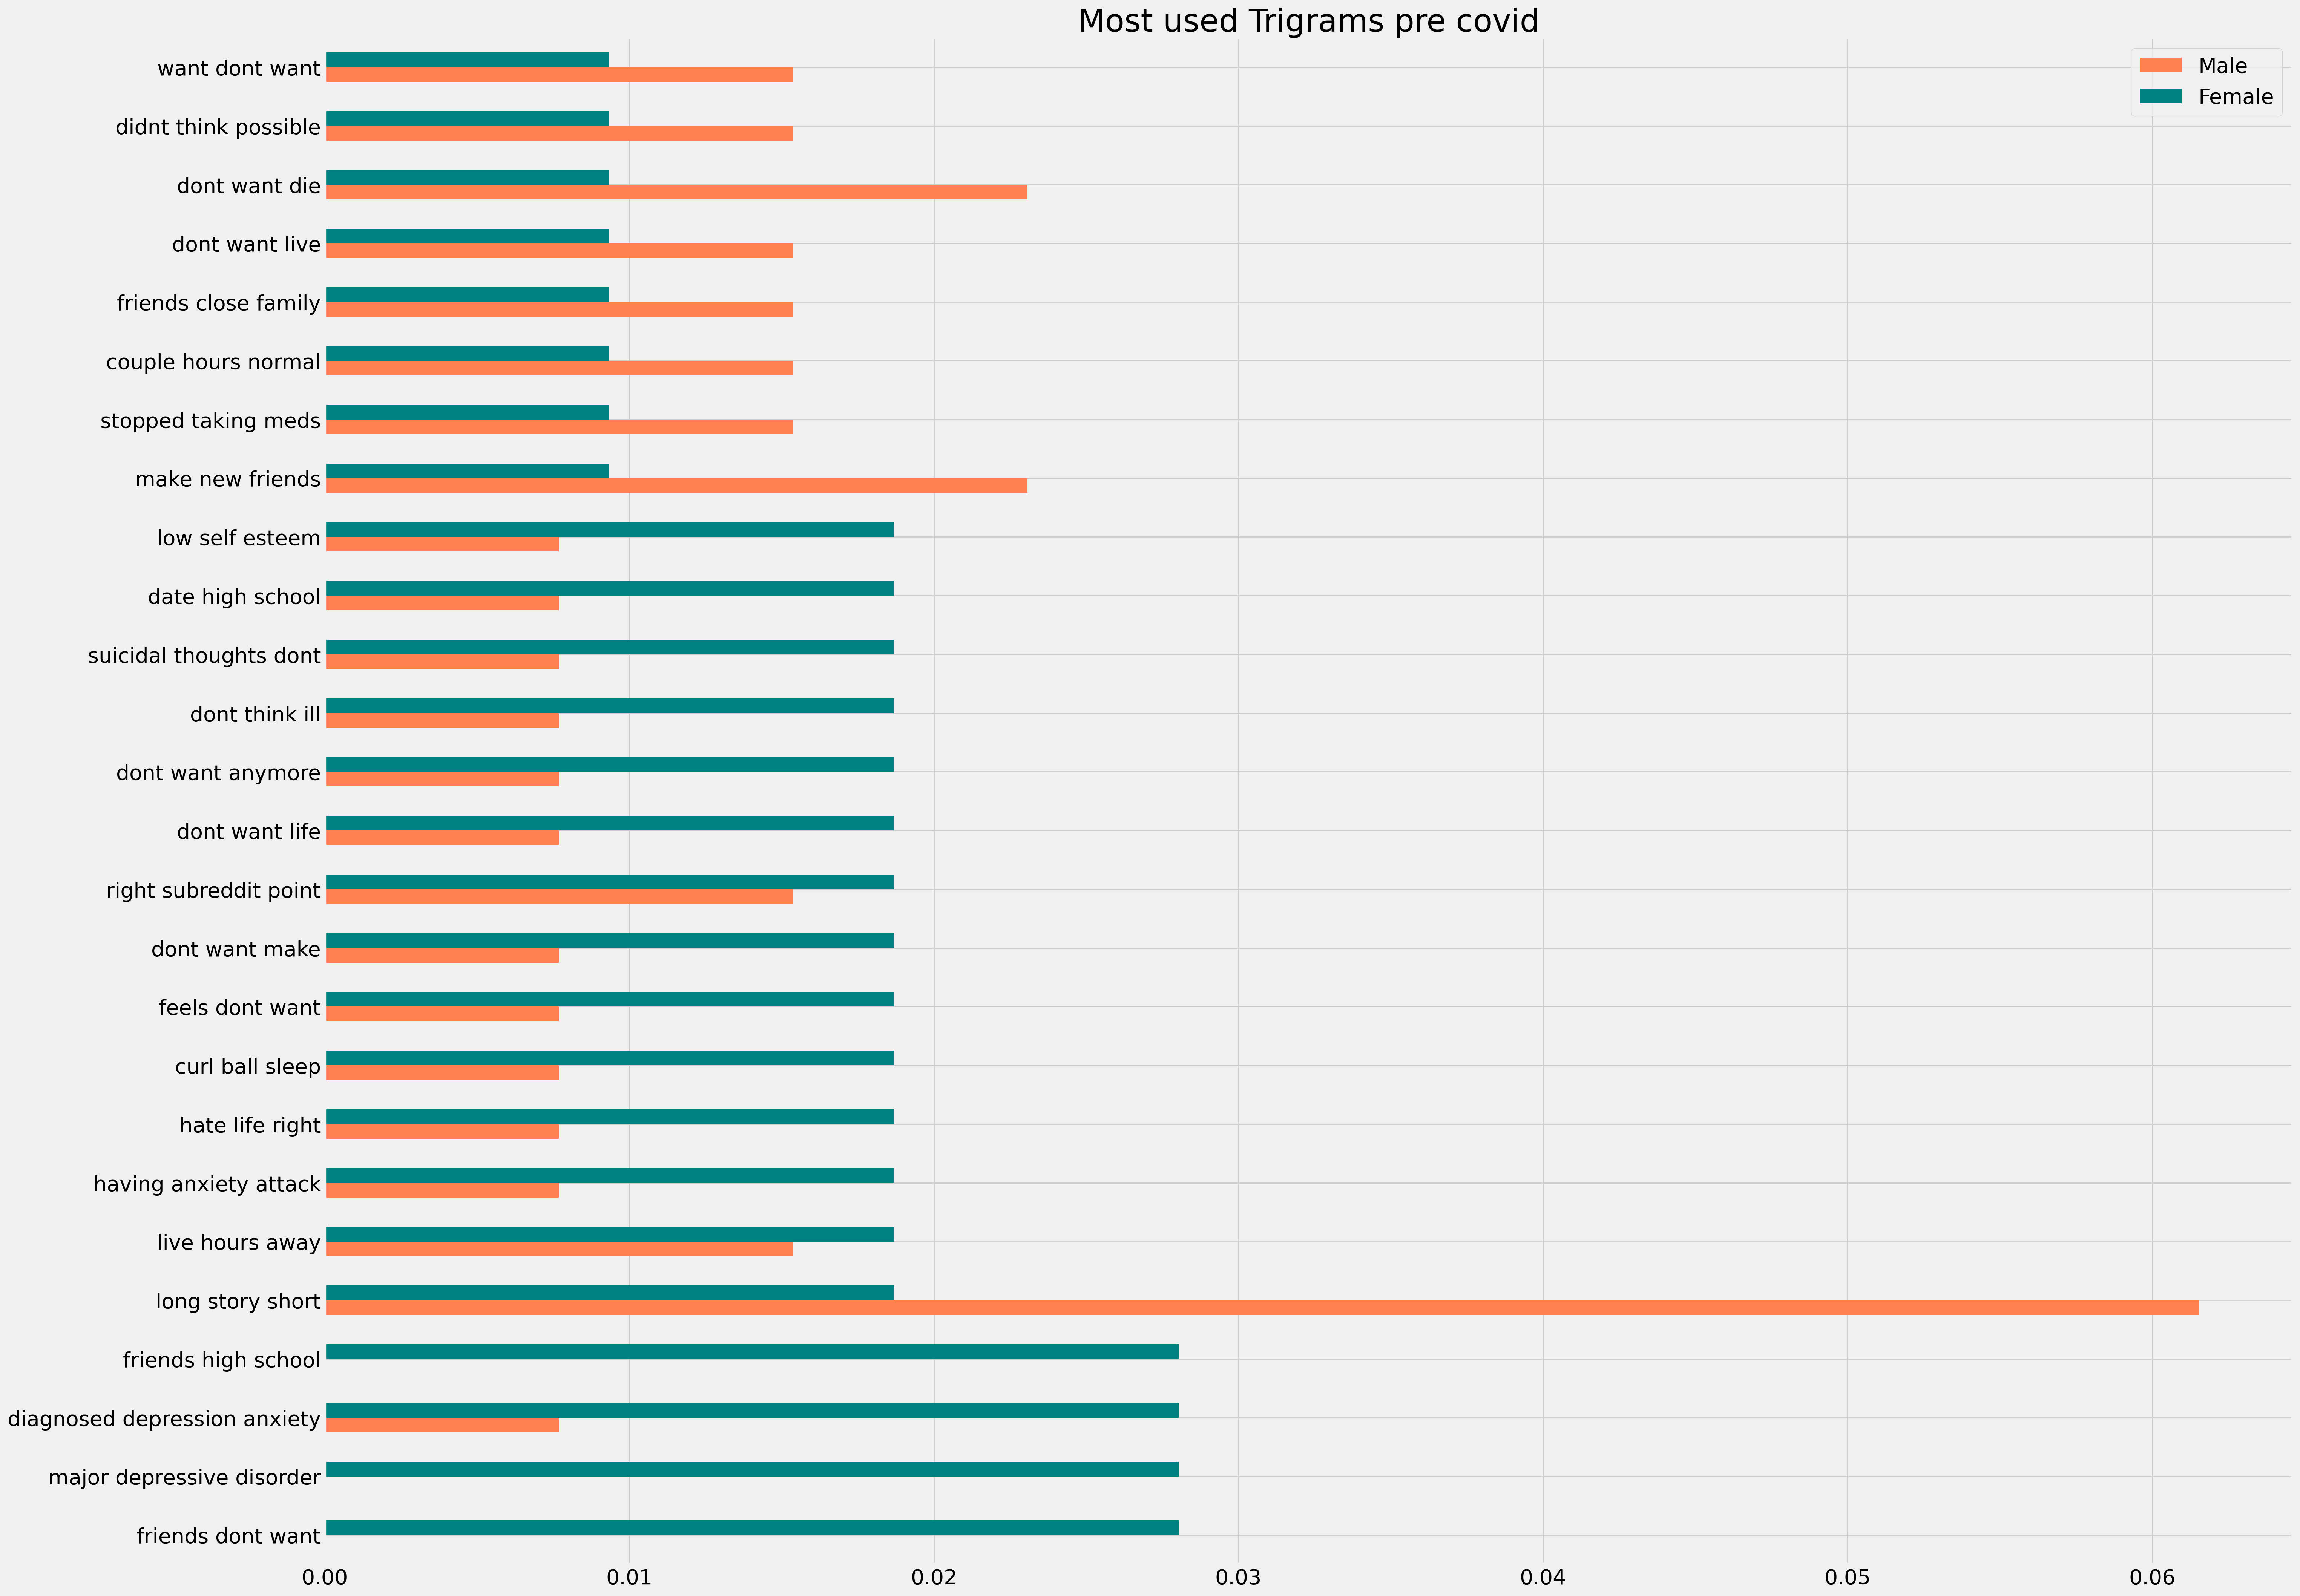

In [70]:
#visulaization of each subreddit 
trigram_pre = top_trigrams.plot(y=[1,0], kind = "barh", color = ["coral", "teal"], figsize = (30,25), fontsize = 20)
plt.title("Most used Trigrams pre covid", fontsize = 30)
plt.legend(labels = ["Male", "Female"], fontsize=20)

In [71]:
trigram_pre.figure.savefig("trigram_pre.png")

#### [ADD COMMENT ABOUT VISUAL!!!]

### Post-covid 

In [45]:
#Create a count vectorizer for two words
#Best model I could find 
cvec6 = CountVectorizer(stop_words=stop_words_list, 
                        min_df=0.008, ngram_range=(3,4), max_df=1.0)

In [46]:
#Fitting and transforming the data for term frequency in each post
term_mat6 = cvec6.fit_transform(df2['post'])

In [47]:
#Make a dataframe for the non stop words
term_df2_post = pd.DataFrame(term_mat6.toarray(), columns=cvec6.get_feature_names_out())

In [48]:
#Inserting class column into dataframe with filtered post
term_df2_post.insert(0, 'post_metric6', sub1)

In [49]:
#sorting by top 30 bigrams 
top_trigrams1 = term_df2_post.groupby('post_metric6').mean().T.sort_values(0, ascending = False).head(30)

In [50]:
top_trigrams1 = top_trigrams1.head(30)
top_trigrams1

post_metric6,0,1
dont want live,0.026667,0.009524
mental health issues,0.026667,0.019048
low self esteem,0.026667,0.019048
docs google forms,0.023333,0.006349
dont want hurt,0.020000,0.003175
dont want anymore,0.016667,0.006349
struggled depression anxiety,0.013333,0.003175
dont want leave,0.013333,0.009524
making new friends,0.013333,0.003175
high functioning depression,0.013333,0.006349


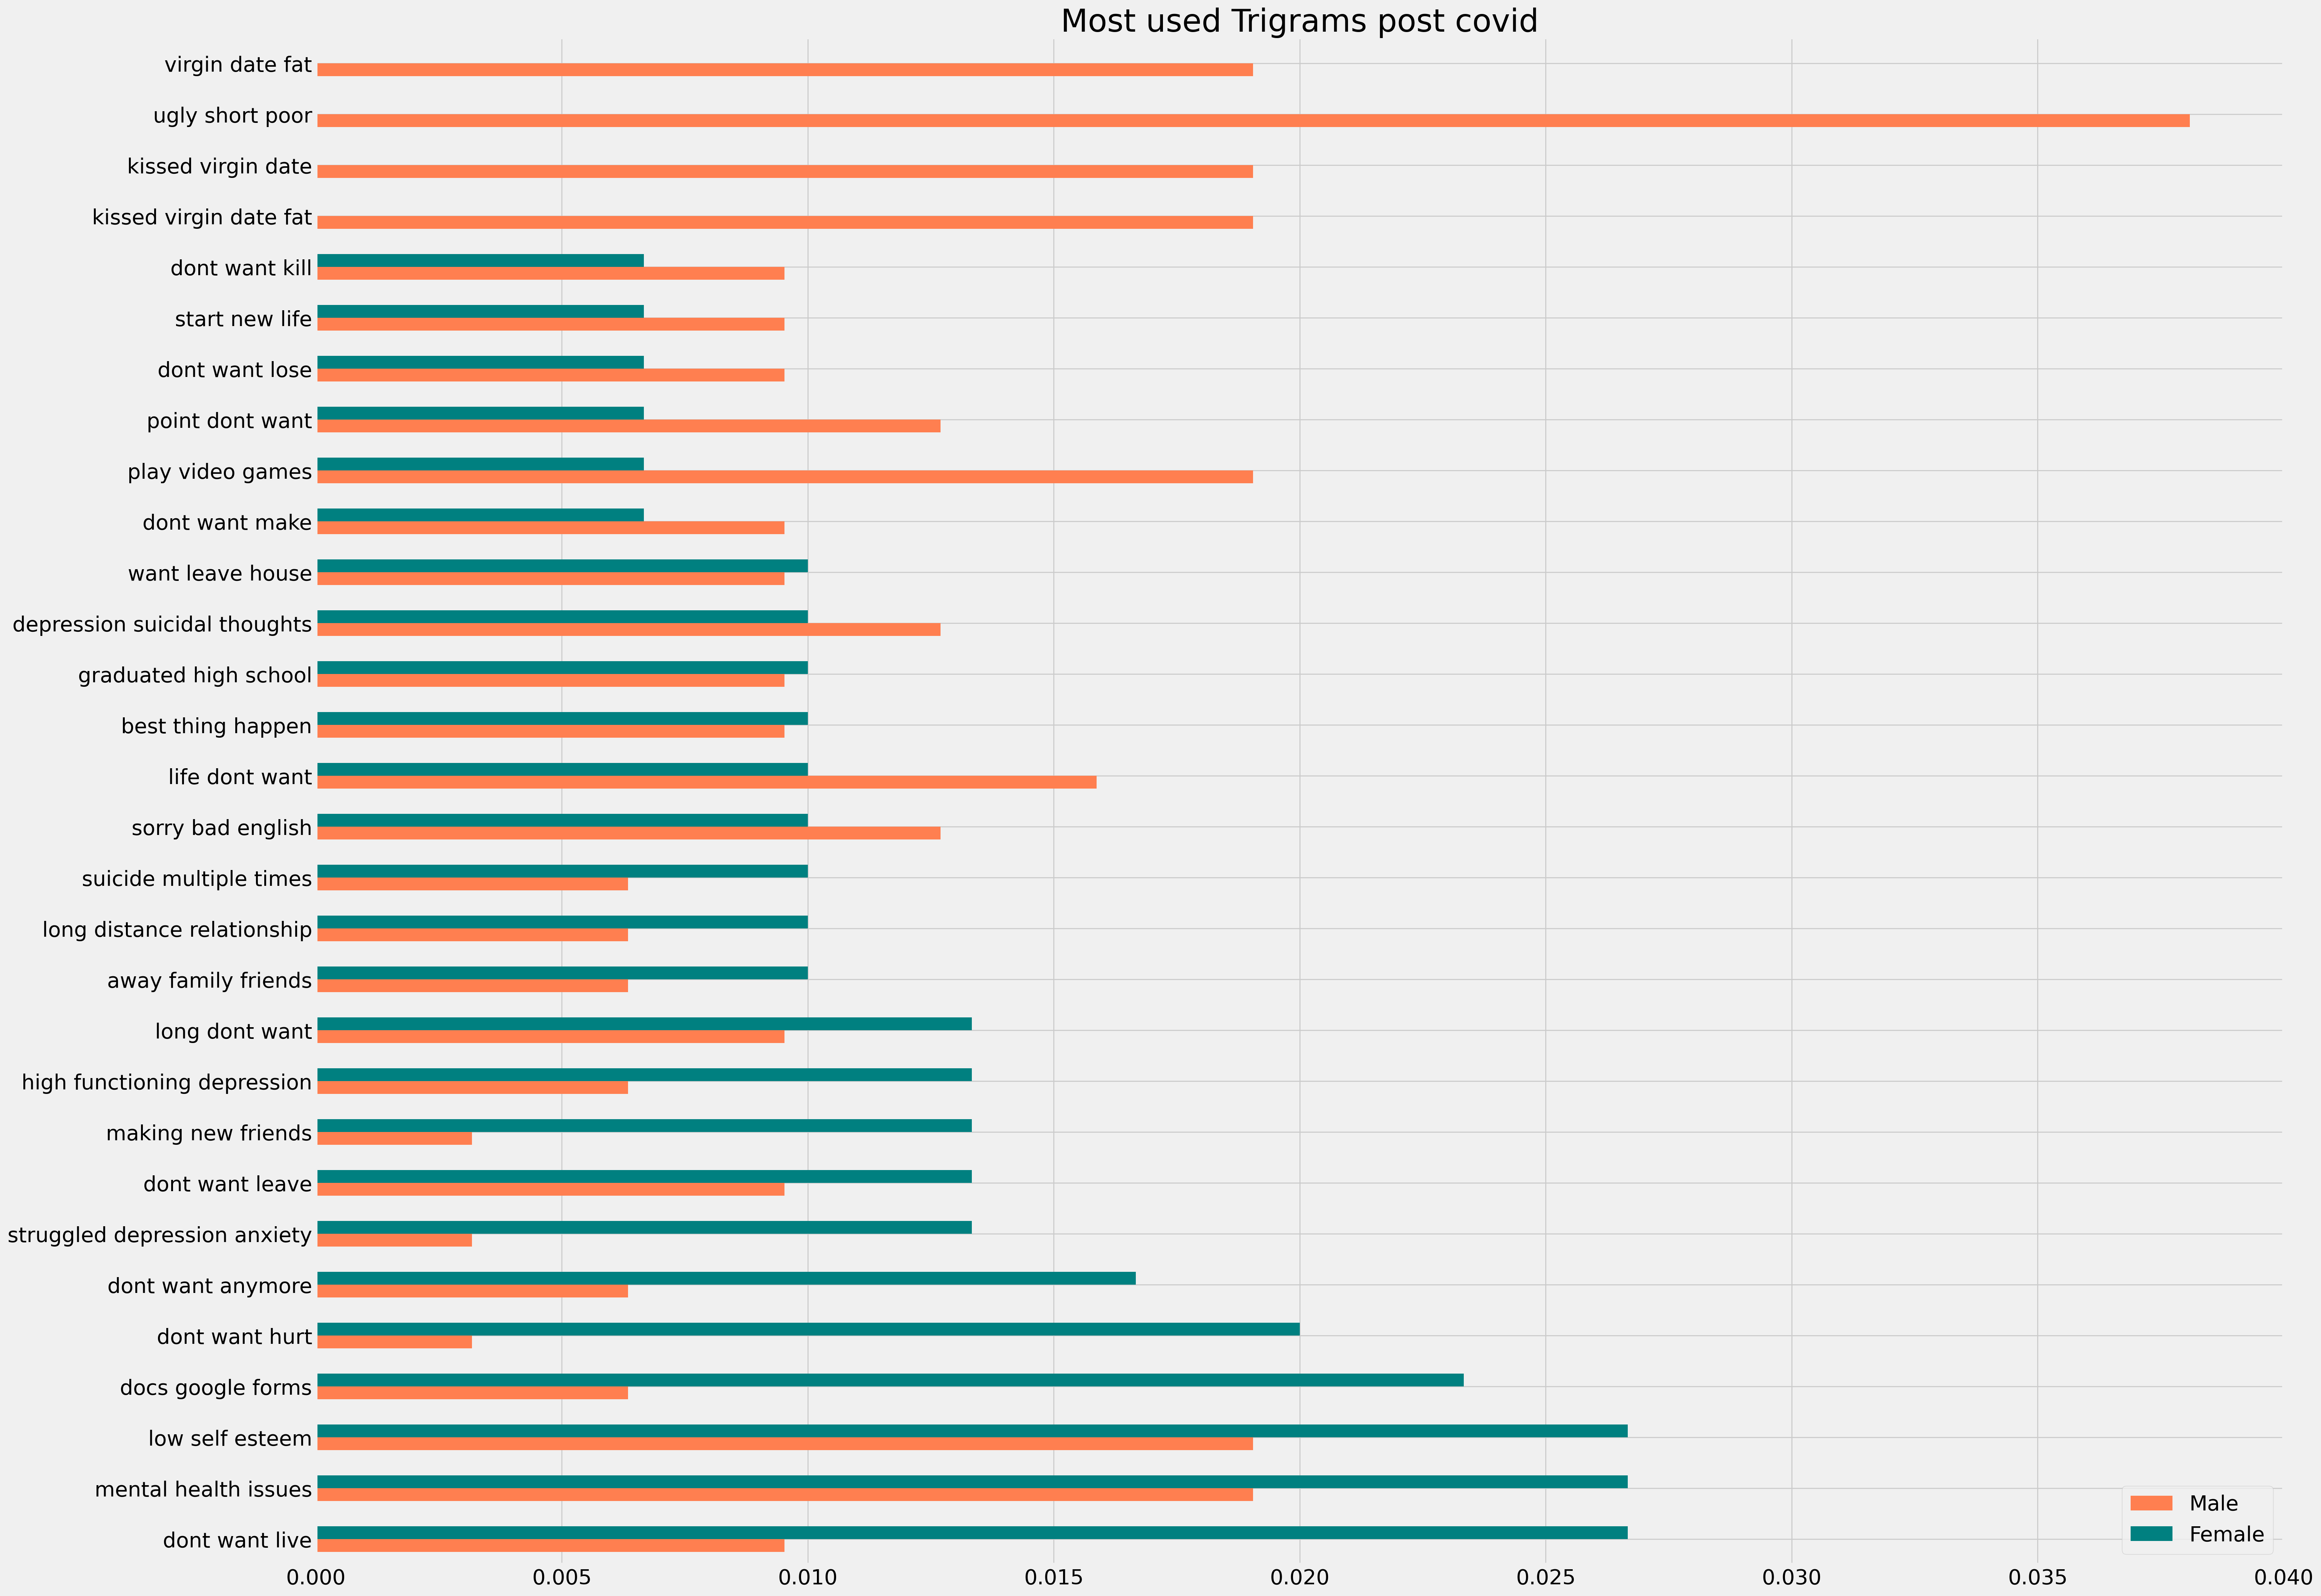

In [72]:
#visulaization of each subreddit 
trigram_post = top_trigrams1.plot(y=[1,0], kind = "barh", color = ["coral", "teal"], figsize = (30,25), fontsize = 20)
plt.title("Most used Trigrams post covid", fontsize = 30)
plt.legend(labels = ["Male", "Female"], fontsize=20)

In [73]:
trigram_post.figure.savefig("trigram_post.png")

#### [ADD COMMENT ABOUT VISUAL!!!]

In [52]:
#Turning clean data frame into a csv 
dep.to_csv('dep.csv', index = False)